In [1]:
import os
import sys
import math
import numpy as np
import numpy.fft as fft
import matplotlib
import matplotlib.pyplot as plt

In [2]:
Lv = 20
N = 2**Lv

In [3]:
print(N)

1048576


In [4]:
epsilon = np.zeros(N,dtype='float64')

In [5]:
epsilon[:] = 1.

In [6]:
s = np.random.uniform(0,1,10**6)

In [8]:
p = 0.7

print(p)
print(1-p)

0.7
0.30000000000000004


In [9]:
chg = 0
Nv = 1
epsilon[:] = 1.
for k in range(Nv):
    div = 2**(k+1)
    chk = N//div
    for i in range(div//2):
        rnd = s[chg]
        chg += 1
        if(rnd >= 0.5):
            #print("left")
            epsilon[(2*i+0)*chk:(2*i+1)*chk] *= p
            epsilon[(2*i+1)*chk:(2*i+2)*chk] *= (1-p)
        else:
            #print("right")
            epsilon[(2*i+0)*chk:(2*i+1)*chk] *= (1-p)
            epsilon[(2*i+1)*chk:(2*i+2)*chk] *= p

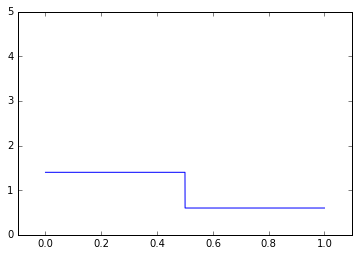

In [10]:
x = np.arange(0,N)
x = x/N
epsAvg = np.average(epsilon)
plt.xlim(-0.1,1.1)
plt.ylim(0,5)
plt.plot(x,epsilon/epsAvg)

In [11]:
chg = 0
Nv = 2
epsilon[:] = 1.
for k in range(Nv):
    div = 2**(k+1)
    chk = N//div
    for i in range(div//2):
        rnd = s[chg]
        chg += 1
        if(rnd >= 0.5):
            #print("left")
            epsilon[(2*i+0)*chk:(2*i+1)*chk] *= p
            epsilon[(2*i+1)*chk:(2*i+2)*chk] *= (1-p)
        else:
            #print("right")
            epsilon[(2*i+0)*chk:(2*i+1)*chk] *= (1-p)
            epsilon[(2*i+1)*chk:(2*i+2)*chk] *= p

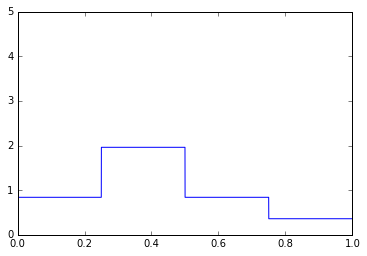

In [12]:
x = np.arange(0,N)
x = x/N
epsAvg = np.average(epsilon)
plt.ylim(0,5)
plt.plot(x,epsilon/epsAvg)

In [13]:
chg = 0
Nv = 9
epsilon[:] = 1.
for k in range(Nv):
    div = 2**(k+1)
    chk = N//div
    for i in range(div//2):
        rnd = s[chg]
        chg += 1
        if(rnd >= 0.5):
            #print("left")
            epsilon[(2*i+0)*chk:(2*i+1)*chk] *= p
            epsilon[(2*i+1)*chk:(2*i+2)*chk] *= (1-p)
        else:
            #print("right")
            epsilon[(2*i+0)*chk:(2*i+1)*chk] *= (1-p)
            epsilon[(2*i+1)*chk:(2*i+2)*chk] *= p

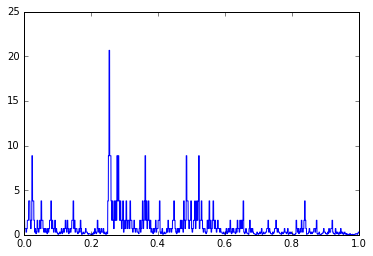

In [14]:
x = np.arange(0,N)
x = x/N
epsAvg = np.average(epsilon)
plt.plot(x,epsilon/epsAvg)

In [15]:
chg = 0
Nv = 13
epsilon[:] = 1.
for k in range(Nv):
    div = 2**(k+1)
    chk = N//div
    for i in range(div//2):
        rnd = s[chg]
        chg += 1
        if(rnd >= 0.5):
            #print("left")
            epsilon[(2*i+0)*chk:(2*i+1)*chk] *= p
            epsilon[(2*i+1)*chk:(2*i+2)*chk] *= (1-p)
        else:
            #print("right")
            epsilon[(2*i+0)*chk:(2*i+1)*chk] *= (1-p)
            epsilon[(2*i+1)*chk:(2*i+2)*chk] *= p

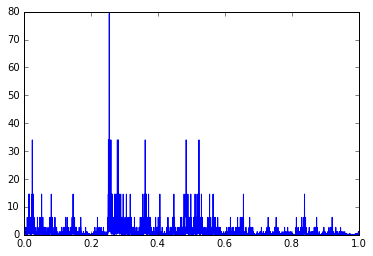

In [16]:
x = np.arange(0,N)
x = x/N
epsAvg = np.average(epsilon)
plt.plot(x,epsilon/epsAvg)

In [17]:
chi = np.zeros(N,dtype='float64')

In [18]:
chi[:] = 0
chi[epsilon > 2*epsAvg] = 1

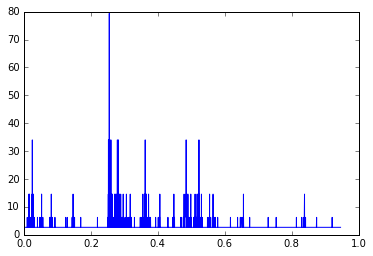

In [19]:

plt.plot(x[epsilon > 2*epsAvg],epsilon[epsilon > 2*epsAvg]/epsAvg)

In [20]:
chi[:] = 0
chi[epsilon > 1*epsAvg] = 1

In [21]:
cchi = fft.rfft(chi)

In [22]:
tmp = cchi*(cchi.conj())

In [23]:
corr = fft.irfft(tmp)

In [24]:
r = np.linspace(0,2*np.pi,N,endpoint=False)

In [25]:
rs = r[r <= np.pi]

In [26]:
c0 = corr[0:1]
c1 = corr[1:N//2]
c2 = corr[(N//2):(N//2+1)]
c3 = corr[(N//2+1):N]

In [27]:
print(c0)
print(c1)
print(c2)
print(c3[::-1])

[ 304640.]
[ 303794.  302948.  302102. ...,   85570.   85548.   85526.]
[ 85504.]
[ 303794.  302948.  302102. ...,   85570.   85548.   85526.]


In [28]:
Corr = np.concatenate((c0,c1,c2))

In [29]:
print(Corr)
print(Corr.shape)

[ 304640.  303794.  302948. ...,   85548.   85526.   85504.]
(524289,)


In [30]:
print(r.shape[0])
print(r.shape[0]//2+1)
print(rs.shape[0])

1048576
524289
524289


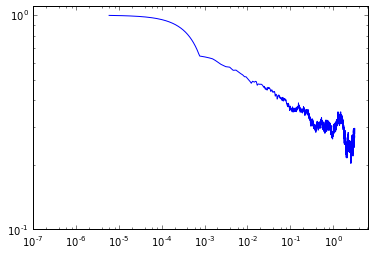

In [31]:
plt.ylim(0.1,1.1)
plt.xlim(10**(-7),2*np.pi)
plt.loglog(rs,Corr/Corr[0],'b')

[-0.12591373 -1.25041563]


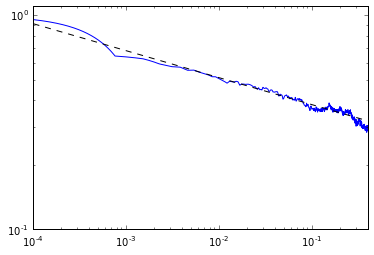

In [32]:
tempRp = rs[(rs>10**(-3))&(rs<10**(-1))]
tempCorr = Corr[(rs>10**(-3))&(rs<10**(-1))]

fit = np.polyfit(np.log(tempRp),np.log(tempCorr/Corr[0]),1)
print(fit)

plt.ylim(0.1,1.1)
plt.xlim(0.1*10**(-3),4*10**(-1))

tempRp = rs[(rs>10**(-4))&(rs<4*10**(-1))]

plt.loglog(rs,Corr/Corr[0],'b')
plt.loglog(tempRp,np.exp(fit[1])*(tempRp**(fit[0])),'k--')

[-0.22021407 -2.03615857]


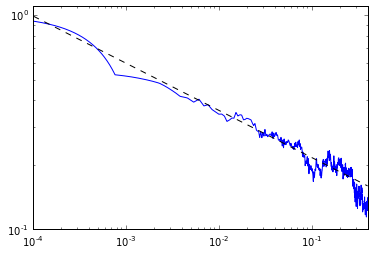

In [33]:
chi[:] = 0
chi[epsilon > 1.5*epsAvg] = 1
cchi = fft.rfft(chi)
tmp = cchi*(cchi.conj())
corr = fft.irfft(tmp)
r = np.linspace(0,2*np.pi,N,endpoint=False)

c0 = corr[0:1]
c1 = corr[1:N//2]
c2 = corr[(N//2):(N//2+1)]
c3 = corr[(N//2+1):N]

Corr = np.concatenate((c0,c1,c2))

tempRp = rs[(rs>10**(-3))&(rs<10**(-1))]
tempCorr = Corr[(rs>10**(-3))&(rs<10**(-1))]

fit = np.polyfit(np.log(tempRp),np.log(tempCorr/Corr[0]),1)
print(fit)

plt.ylim(0.1,1.1)
plt.xlim(0.1*10**(-3),4*10**(-1))

tempRp = rs[(rs>10**(-4))&(rs<4*10**(-1))]

plt.loglog(rs,Corr/Corr[0],'b')
plt.loglog(tempRp,np.exp(fit[1])*(tempRp**(fit[0])),'k--')

[-0.4215521  -3.40595758]


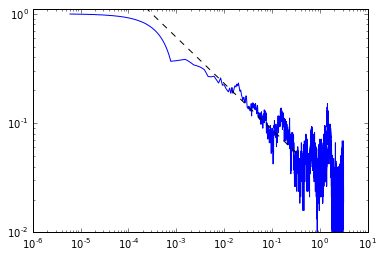

In [39]:
chi[:] = 0
chi[epsilon > 3.*epsAvg] = 1
cchi = fft.rfft(chi)
tmp = cchi*(cchi.conj())
corr = fft.irfft(tmp)
r = np.linspace(0,2*np.pi,N,endpoint=False)

c0 = corr[0:1]
c1 = corr[1:N//2]
c2 = corr[(N//2):(N//2+1)]
c3 = corr[(N//2+1):N]

Corr = np.concatenate((c0,c1,c2))

tempRp = rs[(rs>10**(-3))&(rs<10**(-1))]
tempCorr = Corr[(rs>10**(-3))&(rs<10**(-1))]

fit = np.polyfit(np.log(tempRp),np.log(tempCorr/Corr[0]),1)
print(fit)

plt.ylim(0.01,1.1)
#plt.lim(0.1*10**(-3),10**(-2))

tempRp = rs[(rs>10**(-4))&(rs<4*10**(-1))]

plt.loglog(rs,Corr/Corr[0],'b')
plt.loglog(tempRp,np.exp(fit[1])*(tempRp**(fit[0])),'k--')

[-0.4215521  -3.40595758]


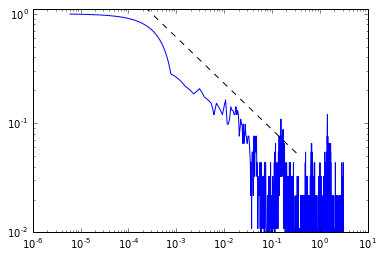

In [42]:
chi[:] = 0
chi[epsilon > 10.*epsAvg] = 1
cchi = fft.rfft(chi)
tmp = cchi*(cchi.conj())
corr = fft.irfft(tmp)
r = np.linspace(0,2*np.pi,N,endpoint=False)

c0 = corr[0:1]
c1 = corr[1:N//2]
c2 = corr[(N//2):(N//2+1)]
c3 = corr[(N//2+1):N]

Corr = np.concatenate((c0,c1,c2))

tempRp = rs[(rs>10**(-3))&(rs<10**(-1))]
tempCorr = Corr[(rs>10**(-3))&(rs<10**(-1))]

#fit = np.polyfit(np.log(tempRp),np.log(tempCorr/Corr[0]),1)
print(fit)

plt.ylim(0.01,1.1)
#plt.lim(0.1*10**(-3),10**(-2))

tempRp = rs[(rs>10**(-4))&(rs<4*10**(-1))]

plt.loglog(rs,Corr/Corr[0],'b')
plt.loglog(tempRp,np.exp(fit[1])*(tempRp**(fit[0])),'k--')